In [6]:
import sys
import os

sys.path.append(os.path.abspath(".."))

(187531, 27)


,index,title,description,amountin_rupees,price_in_rupees,location,carpet_area,status,floor,transaction,...,ownership,super_area,dimensions,plot_area,amount_in_rupees,carpet_area_sqft,super_area_sqft,plot_area_sqft,dimensions_sqft,has_plot_area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,NaN,NaN,4200000.0,500.0,NaN,NaN,NaN,False
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,Freehold,NaN,NaN,NaN,9800000.0,473.0,NaN,NaN,NaN,False
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,Freehold,NaN,NaN,NaN,14000000.0,779.0,NaN,NaN,NaN,False
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,NaN,2500000.0,530.0,NaN,NaN,NaN,False
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,Co-operative Society,NaN,NaN,NaN,16000000.0,635.0,NaN,NaN,NaN,False


plot_area           187531
dimensions_sqft     187531
plot_area_sqft      187531
dimensions          187531
society             109678
super_area          107685
super_area_sqft     107685
car_parking         103357
overlooking          81436
carpet_area_sqft     80673
carpet_area          80673
facing               70233
ownership            65517
balcony              48935
price_in_rupees      17665
amount_in_rupees      9684
floor                 7077
description           3023
furnishing            2897
bathroom               828
status                 615
transaction             83
title                    0
amountin_rupees          0
location                 0
index                    0
has_plot_area            0
dtype: int64

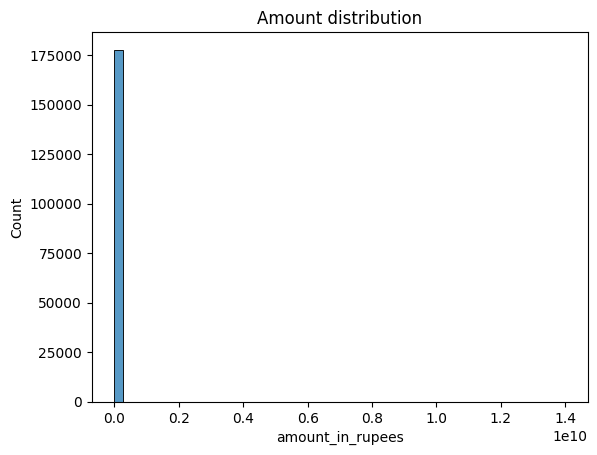

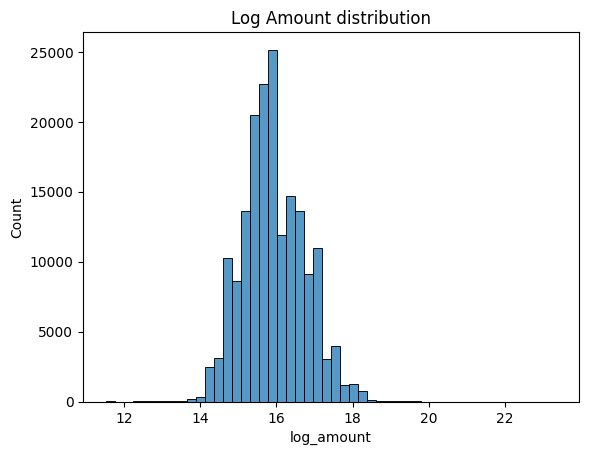


Price quantiles:
0.950    33900000.0
0.990    70000000.0
0.995    89600000.0
Name: amount_in_rupees, dtype: float64
Top locations:
location
new-delhi        27599
bangalore        24030
kolkata          22380
gurgaon          20070
ahmedabad        12750
hyderabad        12300
chennai          10500
jaipur            8490
greater-noida     4710
faridabad         3840
vadodara          2388
surat             2370
pune              2225
thane             1933
mumbai            1860
visakhapatnam     1800
mohali            1710
zirakpur          1530
chandigarh        1440
noida             1281
Name: count, dtype: int64
carpet_area_sqft count    106858.000000
mean       1262.016828
std        3067.120740
min           1.000000
25%         800.000000
50%        1064.000000
75%        1500.000000
max      709222.000000
Name: carpet_area_sqft, dtype: float64
super_area_sqft count     79846.000000
mean       1384.957028
std        2018.062773
min           1.000000
25%        1000.000000
50

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from src.data_utils import load_processed

df = load_processed("house_prices_v1.csv")

print(df.shape)
display(df.head())

missing = df.isna().sum().sort_values(ascending=False)
display(missing.head(30))

df["log_amount"]=np.log1p(df["amount_in_rupees"])

# price distribution
if "amount_in_rupees" in df.columns:
    sns.histplot(df["amount_in_rupees"].dropna(), bins=50)
    plt.title("Amount distribution")
    plt.show()
    sns.histplot(df["log_amount"].dropna(), bins=50)
    plt.title("Log Amount distribution")
    plt.show()

    # outlier
    print("\nPrice quantiles:")
    print(df["amount_in_rupees"].quantile([0.95, 0.99, 0.995]))

# top locations
if "location" in df.columns:
    print("Top locations:")
    print(df["location"].value_counts().nlargest(20))

# area stats
for c in ["carpet_area_sqft","super_area_sqft"]:
    if c in df.columns:
        print(c, df[c].describe())
